In [5]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [6]:
class LinearRegression:
    def __init__(self, learning_rate=0.1, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona termo de enviesamento (bias)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Inicializa os pesos a zero
        
        self.history = []  # Guarda o histórico dos pesos para a animação
        
        for _ in range(self.max_iter):
            for i in range(n_samples):
                y_pred = np.dot(X[i], self.weights)  # Previsão
                error = y[i] - y_pred  # Calcula erro
                self.weights += self.learning_rate * error * X[i]  # Actualiza pesos
            self.history.append(self.weights.copy())  # Guarda os pesos actuais
    
    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona termo de enviesamento (bias)
        return np.dot(X, self.weights)

In [7]:
# Gerar dados aleatórios
np.random.seed(0)
X = np.random.rand(100, 1)  # 100 amostras, 1 variável independente
y = 2 + 3 * X + np.random.randn(100, 1) * 0.1  # Relação linear com algum ruído

# Treinar o modelo
modelo = LinearRegression(learning_rate=0.1, max_iter=100)
modelo.fit(X, y)

# Fazer uma previsão
X_test = np.array([[0.5]])
y_pred = modelo.predict(X_test)
print(f"Previsão para X=0.5: {y_pred[0]}")


Previsão para X=0.5: 3.480859742088086


c:\Users\Luís Pinto Coelho\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


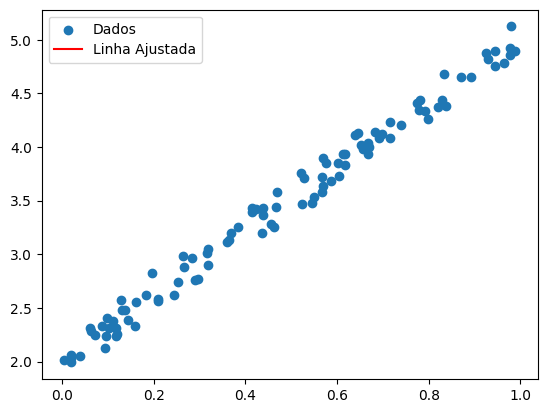

In [8]:
# Criar a figura
fig, ax = plt.subplots()
ax.scatter(X, y, label="Dados")
linha, = ax.plot([], [], 'r-', label="Linha Ajustada")
ax.legend()

# Função de actualização da animação
def update(epoch):
    w0, w1 = modelo.history[epoch]
    x_vals = np.array([0, 1])
    y_vals = w0 + w1 * x_vals
    linha.set_data(x_vals, y_vals)
    return linha,

# Criar a animação
ani = animation.FuncAnimation(fig, update, frames=len(modelo.history), interval=100)
plt.show()


Previsão para X=0.5: 3.480859742088086


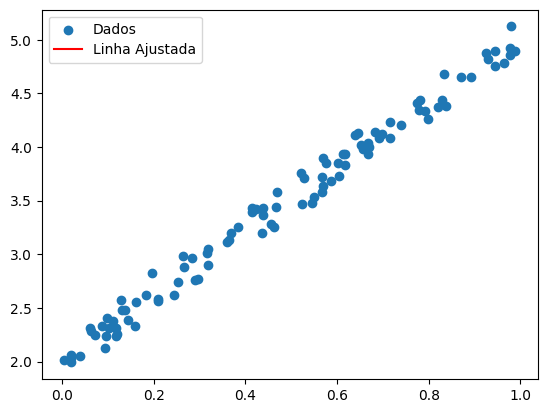

In [9]:
class LinearRegression:
    def __init__(self, learning_rate=0.1, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona termo de enviesamento (bias)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Inicializa os pesos a zero
        
        self.history = []  # Guarda o histórico dos pesos para a animação
        
        for _ in range(self.max_iter):
            for i in range(n_samples):
                y_pred = np.dot(X[i], self.weights)  # Previsão
                error = y[i] - y_pred  # Calcula erro
                self.weights += self.learning_rate * error * X[i]  # Actualiza pesos
            self.history.append(self.weights.copy())  # Guarda os pesos actuais
    
    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona termo de enviesamento (bias)
        return np.dot(X, self.weights)

# Gerar dados aleatórios
np.random.seed(0)
X = np.random.rand(100, 1)  # 100 amostras, 1 variável independente
y = 2 + 3 * X + np.random.randn(100, 1) * 0.1  # Relação linear com algum ruído

# Treinar o modelo
modelo = LinearRegression(learning_rate=0.1, max_iter=100)
modelo.fit(X, y)

# Fazer uma previsão
X_test = np.array([[0.5]])
y_pred = modelo.predict(X_test)
print(f"Previsão para X=0.5: {y_pred[0]}")

# Criar a figura
fig, ax = plt.subplots()
ax.scatter(X, y, label="Dados")
linha, = ax.plot([], [], 'r-', label="Linha Ajustada")
ax.legend()

# Função de actualização da animação
def update(epoch):
    w0, w1 = modelo.history[epoch]
    x_vals = np.array([0, 1])
    y_vals = w0 + w1 * x_vals
    linha.set_data(x_vals, y_vals)
    return linha,

# Criar a animação
ani = animation.FuncAnimation(fig, update, frames=len(modelo.history), interval=100)
plt.show()

# --- Adaptação para Classificação Binária ---
class LogisticRegression:
    def __init__(self, learning_rate=0.1, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(self.max_iter):
            for i in range(n_samples):
                y_pred = self.sigmoid(np.dot(X[i], self.weights))
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * X[i]
    
    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return (self.sigmoid(np.dot(X, self.weights)) >= 0.5).astype(int)
